In [1]:
import numpy as np
import torch

In [3]:
dataset = np.loadtxt("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", delimiter=',')

In [5]:
X= dataset[:,0:8]
y = dataset[:,8]

In [7]:
X = torch.tensor(X,dtype=torch.float32)
y = torch.tensor(y,dtype=torch.float32).reshape(-1,1)

<ipython-input-7-bbb194bbcd9a>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X,dtype=torch.float32)


In [8]:
Xtrain = X[:700]
ytrain = y[:700]
Xtest=X[700:]
ytest=y[700:]
# split le dataset dans un training et test set

In [9]:
import torch.nn as nn
import torch.optim as optim

In [13]:
model = nn.Sequential(
    nn.Linear(8,12),
    nn.ReLU(),
    nn.Linear(12,8),
    nn.ReLU(),
    nn.Linear(8,1),
    nn.Sigmoid()
)

# 3 couches linéaire, avec une fonction activation reLU Et une linaire avec la fonction activation SIgmoid

Fonction linear y = ax+b

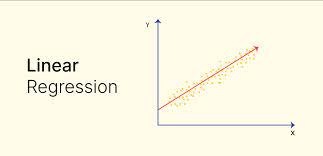

Fonction activation relu tel que f(x) = max(0,x)

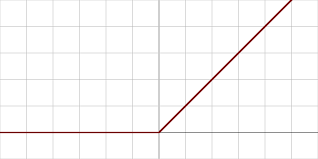

Fonction activation sigmoid f(x) = 1/1+e^-x

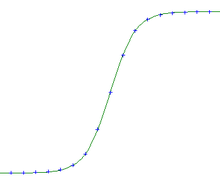

In [14]:
print(model)

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)


In [17]:
critetion = nn.BCELoss()

**La Binary Cross Entropy** Loss mesure l'écart entre les prédictions d'un modèle et les vraies labels dans un problème de classification binaire.

Lors de la phase d'entraînement, on utilisera cette fonction de perte pour calculer l'erreur entre les prédictions du modèle et les vraies étiquettes, puis on ajustera les poids du réseau pour minimiser cette erreur lors de la rétropropagation (backpropagation).

In [16]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

Adam = methode optimisation qui adapte le taux d'apprentissage de chaque paramètre du model de maniere adaptive en fonctions des gradients

LR : Learning rate -> hyperparametre qui joue sur la descente de gradient
en multipliant le grad *lr

In [25]:
n_epochs = 50 # nombre iteration
batch_size = 10  # nombre de lot
batches_per_epochs = len(Xtrain)  # nombre de lot former a partir de l'ensemble d'entrainement

In [31]:
train_loss = [] # -> stock les valeur de perte de chaque batch
train_acc = [] #  ""  " "  """  precision d'entrainement """"""
test_acc = [] # -> """"""""  precision de test"""""""""

In [45]:
for epochs in range(n_epochs):
  for i in range(batches_per_epochs):
    start = i*batch_size # calculd l'indice de départ * le batch actuel
    Xbatch = Xtrain[start:start+batch_size] # -> extraction d'une section du batch de l'ensemble d'entrainement (features)
    yBatch = ytrain[start:start+batch_size] # -> same mais labels

    y_pred = model(Xbatch) # calcule la pediction du batch
    loss = critetion(y_pred, yBatch) # calcule la perte entre les prédiction et les batch
    acc = (y_pred.round() == yBatch).float().mean()
        # store metrics
    train_loss.append(float(loss))
    train_acc.append(float(acc))
    optimizer.zero_grad() # -> renitialisation des gradiant https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.zero_grad.html
    loss.backward() # -> calcule les gradiant par rapport au parametre ex: dloss/dx
    optimizer.step() # -> msise a jour des poids https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.step.html


  y_pred = model(Xtest)
  acc = (y_pred.round() == ytest).float().mean()
  test_acc.append(float(acc))
  print(f"Fin de l'epoch numéro : {epochs}, accuracy : {acc}")

Fin de l'epoch numéro : 0, accuracy : 0.720588207244873
Fin de l'epoch numéro : 1, accuracy : 0.7058823704719543
Fin de l'epoch numéro : 2, accuracy : 0.75
Fin de l'epoch numéro : 3, accuracy : 0.720588207244873
Fin de l'epoch numéro : 4, accuracy : 0.6911764740943909
Fin de l'epoch numéro : 5, accuracy : 0.75
Fin de l'epoch numéro : 6, accuracy : 0.720588207244873
Fin de l'epoch numéro : 7, accuracy : 0.7352941036224365
Fin de l'epoch numéro : 8, accuracy : 0.7058823704719543
Fin de l'epoch numéro : 9, accuracy : 0.720588207244873
Fin de l'epoch numéro : 10, accuracy : 0.720588207244873
Fin de l'epoch numéro : 11, accuracy : 0.75
Fin de l'epoch numéro : 12, accuracy : 0.6911764740943909
Fin de l'epoch numéro : 13, accuracy : 0.6911764740943909
Fin de l'epoch numéro : 14, accuracy : 0.7352941036224365
Fin de l'epoch numéro : 15, accuracy : 0.720588207244873
Fin de l'epoch numéro : 16, accuracy : 0.7352941036224365
Fin de l'epoch numéro : 17, accuracy : 0.7352941036224365
Fin de l'epoch

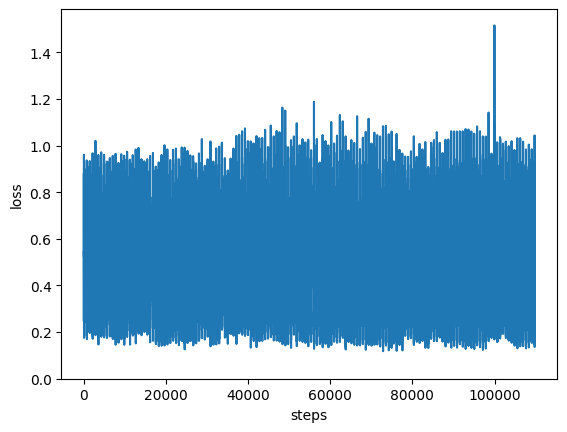

In [40]:
import matplotlib.pyplot as plt
plt.plot(train_loss)
plt.xlabel("steps")
plt.ylabel("loss")
plt.ylim(0)
plt.show()

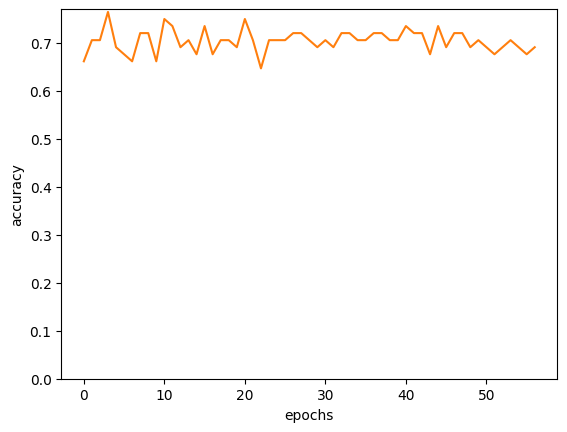

In [42]:
avg_train_acc = []
for i in range(n_epochs):
    start = i * batch_size
    average = sum(train_acc[start:start+batches_per_epochs]) / batches_per_epochs

plt.plot(avg_train_acc, label="train")
plt.plot(test_acc, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0)
plt.show()